2019 Q1: 1794 loans, Target sum: ₱450,000,000, Required avg: ₱250,836
2019 Q2: 2577 loans, Target sum: ₱520,000,000, Required avg: ₱201,785
2019 Q3: 2882 loans, Target sum: ₱570,000,000, Required avg: ₱197,779
2019 Q4: 3097 loans, Target sum: ₱620,000,000, Required avg: ₱200,194
2020 Q1: 2636 loans, Target sum: ₱580,000,000, Required avg: ₱220,030
2020 Q2: 880 loans, Target sum: ₱220,000,000, Required avg: ₱250,000
2020 Q3: 746 loans, Target sum: ₱185,000,000, Required avg: ₱247,989
2020 Q4: 676 loans, Target sum: ₱172,000,000, Required avg: ₱254,438
2021 Q1: 810 loans, Target sum: ₱188,000,000, Required avg: ₱232,099
2021 Q2: 823 loans, Target sum: ₱212,000,000, Required avg: ₱257,594
2021 Q3: 748 loans, Target sum: ₱195,000,000, Required avg: ₱260,695
2021 Q4: 829 loans, Target sum: ₱221,000,000, Required avg: ₱266,586
2022 Q1: 855 loans, Target sum: ₱245,000,000, Required avg: ₱286,550
2022 Q2: 804 loans, Target sum: ₱268,000,000, Required avg: ₱333,333
2022 Q3: 768 loans, Target su

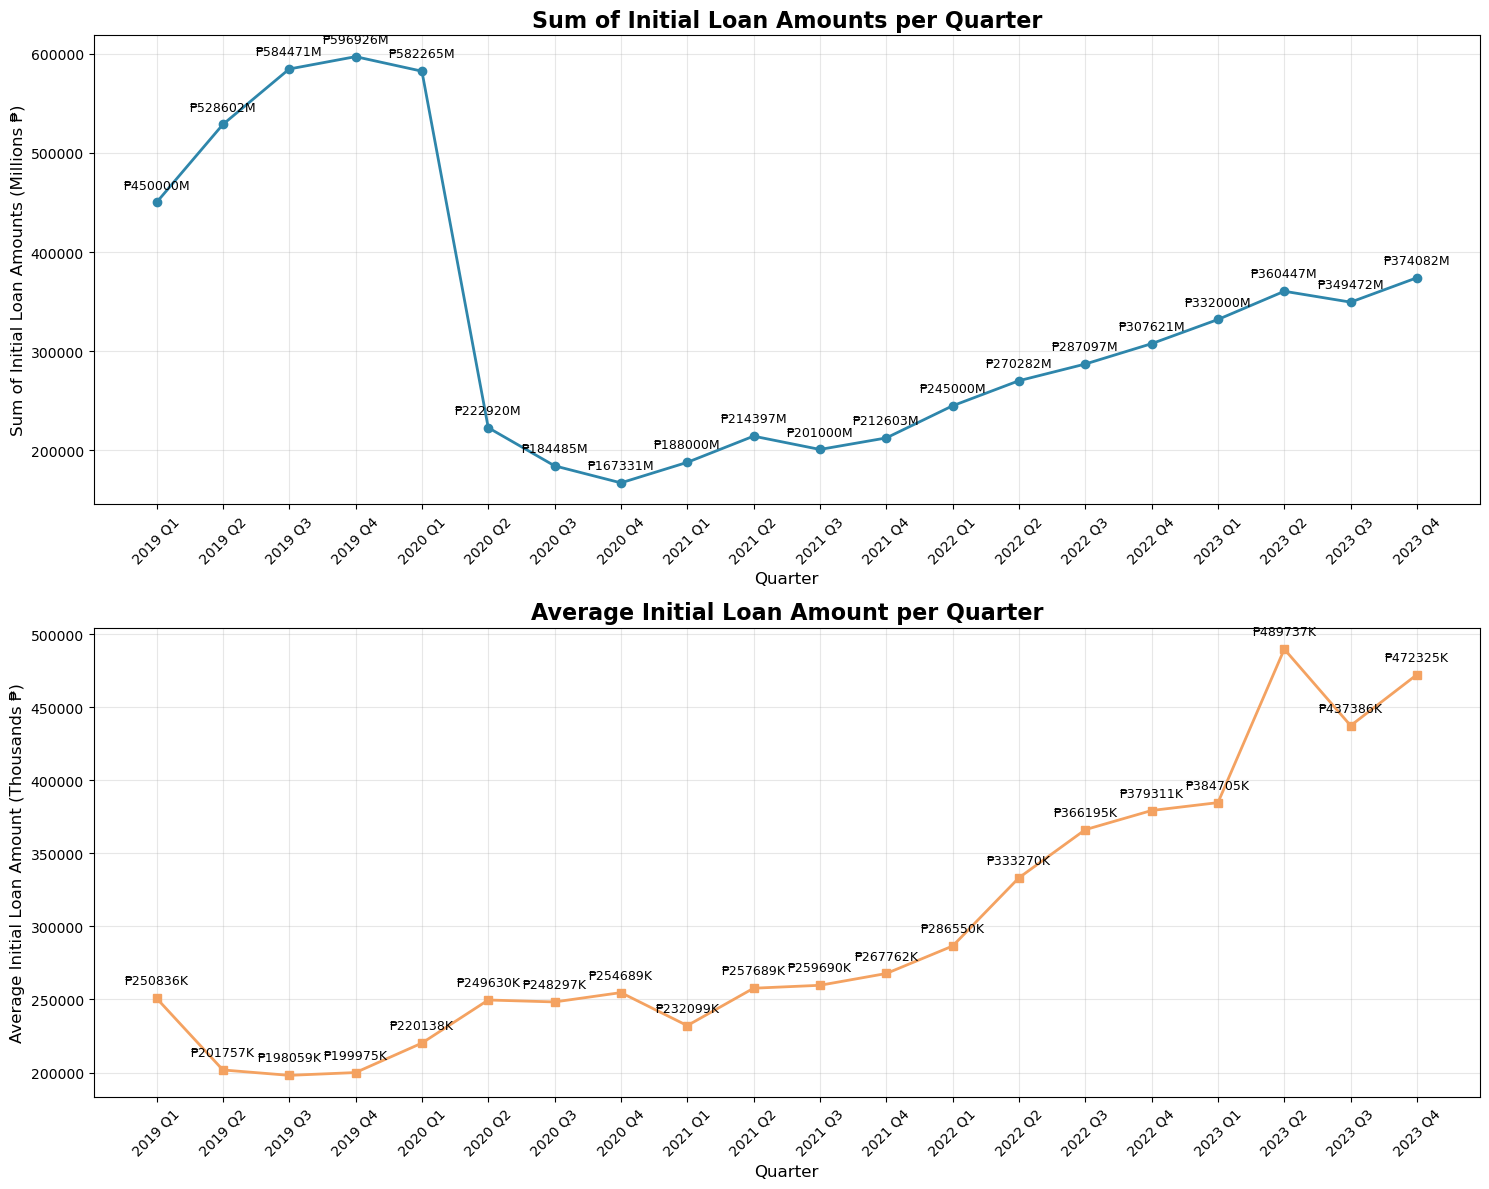


SUM of Initial Loan Amounts by Quarter:
2019 Q1: ₱450000 million
2019 Q2: ₱528602 million
2019 Q3: ₱584471 million
2019 Q4: ₱596926 million
2020 Q1: ₱582265 million
2020 Q2: ₱222920 million
2020 Q3: ₱184485 million
2020 Q4: ₱167331 million
2021 Q1: ₱188000 million
2021 Q2: ₱214397 million
2021 Q3: ₱201000 million
2021 Q4: ₱212603 million
2022 Q1: ₱245000 million
2022 Q2: ₱270282 million
2022 Q3: ₱287097 million
2022 Q4: ₱307621 million
2023 Q1: ₱332000 million
2023 Q2: ₱360447 million
2023 Q3: ₱349472 million
2023 Q4: ₱374082 million

AVERAGE Initial Loan Amounts by Quarter:
2019 Q1: ₱250836 thousand
2019 Q2: ₱201757 thousand
2019 Q3: ₱198059 thousand
2019 Q4: ₱199975 thousand
2020 Q1: ₱220138 thousand
2020 Q2: ₱249630 thousand
2020 Q3: ₱248297 thousand
2020 Q4: ₱254689 thousand
2021 Q1: ₱232099 thousand
2021 Q2: ₱257689 thousand
2021 Q3: ₱259690 thousand
2021 Q4: ₱267762 thousand
2022 Q1: ₱286550 thousand
2022 Q2: ₱333270 thousand
2022 Q3: ₱366195 thousand
2022 Q4: ₱379311 thousand
2

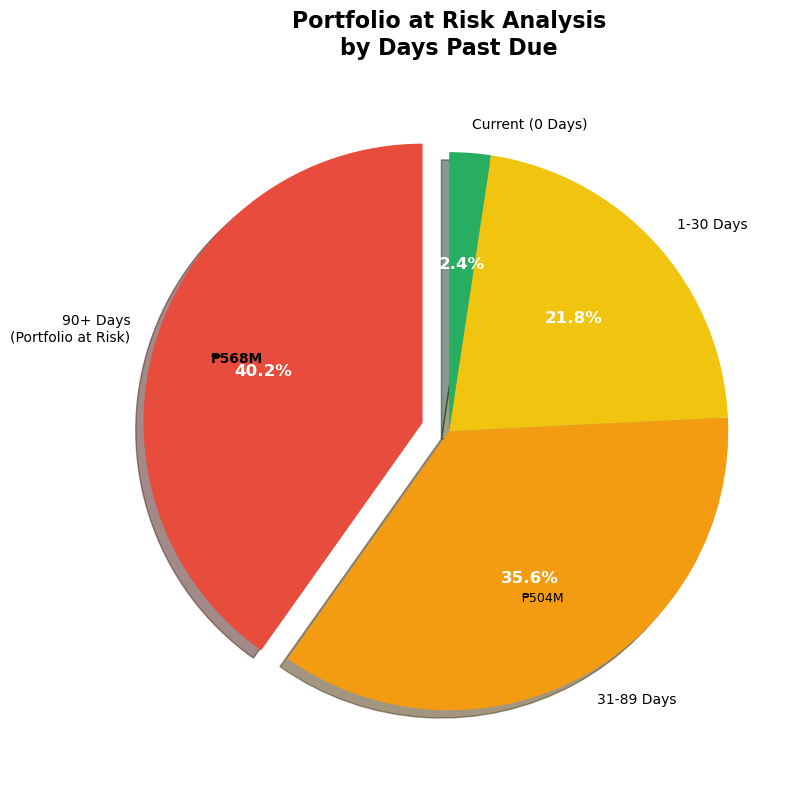


=== PORTFOLIO RISK SUMMARY ===
Total Outstanding Balance: ₱1,414,564,243.90
Portfolio at Risk (90+ days): ₱568,403,106.54 (40.2%)
Target Portfolio at Risk: ~40%
✅ Portfolio at Risk is within target range!


In [1]:
import pandas as pd
import numpy as np
import random
import uuid
from datetime import datetime, timedelta
import csv
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)
random.seed(42)

# Philippines provinces and cities data
provinces_cities = {
    'Metro Manila': ['Manila', 'Quezon City', 'Caloocan', 'Las Piñas', 'Makati', 'Malabon', 'Mandaluyong', 'Marikina', 'Muntinlupa', 'Navotas', 'Parañaque', 'Pasay', 'Pasig', 'Pateros', 'San Juan', 'Taguig', 'Valenzuela'],
    'Cebu': ['Cebu City', 'Lapu-Lapu', 'Mandaue', 'Toledo', 'Bogo', 'Carcar', 'Danao', 'Naga', 'Talisay'],
    'Davao del Sur': ['Davao City', 'Digos', 'Hagonoy', 'Kiblawan', 'Magsaysay', 'Malalag', 'Matanao', 'Padada', 'Santa Cruz', 'Sulop'],
    'Laguna': ['Calamba', 'San Pablo', 'Biñan', 'Santa Rosa', 'Cabuyao', 'San Pedro', 'Los Baños', 'Bay', 'Alaminos', 'Calauan'],
    'Cavite': ['Bacoor', 'Dasmariñas', 'Imus', 'General Trias', 'Las Piñas', 'Silang', 'Tagaytay', 'Trece Martires', 'Carmona', 'General Mariano Alvarez'],
    'Bulacan': ['Malolos', 'Meycauayan', 'San Jose del Monte', 'Marilao', 'Bocaue', 'Balagtas', 'Guiguinto', 'Pandi', 'Plaridel', 'Pulilan'],
    'Pampanga': ['San Fernando', 'Angeles', 'Mabalacat', 'Apalit', 'Arayat', 'Bacolor', 'Candaba', 'Floridablanca', 'Guagua', 'Lubao'],
    'Batangas': ['Batangas City', 'Lipa', 'Tanauan', 'Santo Tomas', 'Calaca', 'Lemery', 'Nasugbu', 'Rosario', 'San Juan', 'Taal'],
    'Rizal': ['Antipolo', 'Cainta', 'Taytay', 'Angono', 'Binangonan', 'Cardona', 'Jalajala', 'Morong', 'Pililla', 'Rodriguez'],
    'Pangasinan': ['Dagupan', 'San Carlos', 'Urdaneta', 'Alaminos', 'Bayambang', 'Binmaley', 'Calasiao', 'Lingayen', 'Malasiqui', 'Mangaldan'],
    'Nueva Ecija': ['Cabanatuan', 'Gapan', 'San Jose', 'Palayan', 'Aliaga', 'Bongabon', 'Cabiao', 'Carranglan', 'Cuyapo', 'Gabaldon'],
    'Tarlac': ['Tarlac City', 'Paniqui', 'Concepcion', 'Bamban', 'Camiling', 'Capas', 'Gerona', 'La Paz', 'Mayantoc', 'Moncada'],
    'Ilocos Norte': ['Laoag', 'Batac', 'Burgos', 'Currimao', 'Dingras', 'Dumalneg', 'Marcos', 'Nueva Era', 'Pagudpud', 'Paoay'],
    'Ilocos Sur': ['Vigan', 'Candon', 'Alilem', 'Banayoyo', 'Bantay', 'Burgos', 'Cabugao', 'Caoayan', 'Cervantes', 'Galimuyod'],
    'La Union': ['San Fernando', 'Agoo', 'Aringay', 'Bacnotan', 'Bagulin', 'Balaoan', 'Bangar', 'Bauang', 'Burgos', 'Caba'],
    'Isabela': ['Ilagan', 'Cauayan', 'Santiago', 'Alicia', 'Angadanan', 'Aurora', 'Benito Soliven', 'Burgos', 'Cabagan', 'Cabatuan'],
    'Cagayan': ['Tuguegarao', 'Aparri', 'Baggao', 'Ballesteros', 'Buguey', 'Calayan', 'Camalaniugan', 'Claveria', 'Enrile', 'Gattaran'],
    'Albay': ['Legazpi', 'Ligao', 'Tabaco', 'Bacacay', 'Camalig', 'Daraga', 'Guinobatan', 'Jovellar', 'Libon', 'Malilipot'],
    'Camarines Sur': ['Naga', 'Iriga', 'Baao', 'Balatan', 'Bato', 'Bombon', 'Buhi', 'Bula', 'Cabusao', 'Calabanga'],
    'Sorsogon': ['Sorsogon City', 'Barcelona', 'Bulan', 'Bulusan', 'Casiguran', 'Castilla', 'Donsol', 'Gubat', 'Irosin', 'Juban'],
    'Masbate': ['Masbate City', 'Aroroy', 'Baleno', 'Balud', 'Batuan', 'Cataingan', 'Cawayan', 'Claveria', 'Dimasalang', 'Esperanza'],
    'Aklan': ['Kalibo', 'Altavas', 'Balete', 'Banga', 'Batan', 'Buruanga', 'Ibajay', 'Lezo', 'Libacao', 'Madalag'],
    'Antique': ['San Jose', 'Belison', 'Bugasong', 'Caluya', 'Culasi', 'Hamtic', 'Laua-an', 'Libertad', 'Pandan', 'Patnongon'],
    'Capiz': ['Roxas', 'Dao', 'Dumalag', 'Dumarao', 'Ivisan', 'Jamindan', 'Ma-ayon', 'Mambusao', 'Panay', 'Panitan'],
    'Iloilo': ['Iloilo City', 'Passi', 'Ajuy', 'Alimodian', 'Anilao', 'Badiangan', 'Balasan', 'Banate', 'Barotac Nuevo', 'Barotac Viejo'],
    'Negros Occidental': ['Bacolod', 'Bago', 'Cadiz', 'Escalante', 'Himamaylan', 'Kabankalan', 'La Carlota', 'Sagay', 'San Carlos', 'Silay'],
    'Negros Oriental': ['Dumaguete', 'Bais', 'Bayawan', 'Canlaon', 'Guihulngan', 'Tanjay', 'Amlan', 'Ayungon', 'Bacong', 'Basay'],
    'Bohol': ['Tagbilaran', 'Alburquerque', 'Alicia', 'Anda', 'Antequera', 'Baclayon', 'Balilihan', 'Batuan', 'Bien Unido', 'Bilar'],
    'Leyte': ['Tacloban', 'Ormoc', 'Maasin', 'Abuyog', 'Alangalang', 'Albuera', 'Babatngon', 'Barugo', 'Bato', 'Baybay'],
    'Samar': ['Catbalogan', 'Basey', 'Calbayog', 'Daram', 'Gandara', 'Hinabangan', 'Jiabong', 'Marabut', 'Matuguinao', 'Motiong'],
    'Eastern Samar': ['Borongan', 'Arteche', 'Balangiga', 'Balangkayan', 'Can-avid', 'Dolores', 'General MacArthur', 'Giporlos', 'Guiuan', 'Hernani'],
    'Northern Samar': ['Catarman', 'Allen', 'Biri', 'Bobon', 'Capul', 'Catubig', 'Gamay', 'Laoang', 'Lapinig', 'Las Navas'],
    'Palawan': ['Puerto Princesa', 'Aborlan', 'Agutaya', 'Araceli', 'Balabac', 'Bataraza', 'Brookes Point', 'Busuanga', 'Cagayancillo', 'Coron'],
    'Zamboanga del Norte': ['Dapitan', 'Dipolog', 'Rizal', 'Bacungan', 'Baliguian', 'Godod', 'Gutalac', 'Jose Dalman', 'Kalawit', 'Katipunan'],
    'Zamboanga del Sur': ['Pagadian', 'Zamboanga City', 'Aurora', 'Bayog', 'Dimataling', 'Dinas', 'Dumalinao', 'Dumingag', 'Guipos', 'Josefina'],
    'Zamboanga Sibugay': ['Ipil', 'Alicia', 'Buug', 'Diplahan', 'Imelda', 'Kabasalan', 'Mabuhay', 'Malangas', 'Naga', 'Olutanga'],
    'Misamis Oriental': ['Cagayan de Oro', 'Gingoog', 'Alubijid', 'Balingasag', 'Balingoan', 'Binuangan', 'Claveria', 'El Salvador', 'Gitagum', 'Initao'],
    'Misamis Occidental': ['Oroquieta', 'Ozamiz', 'Tangub', 'Aloran', 'Baliangao', 'Bonifacio', 'Calamba', 'Clarin', 'Concepcion', 'Don Victoriano Chiongbian'],
    'Bukidnon': ['Malaybalay', 'Valencia', 'Cabanglasan', 'Damulog', 'Dangcagan', 'Don Carlos', 'Impasugong', 'Kadingilan', 'Kalilangan', 'Kibawe'],
    'Lanao del Norte': ['Iligan', 'Bacolod', 'Baloi', 'Bayang', 'Kapatagan', 'Kauswagan', 'Kolambugan', 'Lala', 'Linamon', 'Magsaysay'],
    'Lanao del Sur': ['Marawi', 'Bacolod-Kalawi', 'Balabagan', 'Balindong', 'Bayang', 'Binidayan', 'Buadiposo-Buntong', 'Bubong', 'Butig', 'Calanogas'],
    'Davao del Norte': ['Tagum', 'Panabo', 'Samal', 'Asuncion', 'Braulio E. Dujali', 'Carmen', 'Kapalong', 'New Corella', 'San Isidro', 'Santo Tomas'],
    'Davao Oriental': ['Mati', 'Baganga', 'Banaybanay', 'Boston', 'Caraga', 'Cateel', 'Governor Generoso', 'Lupon', 'Manay', 'San Isidro'],
    'Compostela Valley': ['Nabunturan', 'Compostela', 'Laak', 'Mabini', 'Maco', 'Maragusan', 'Mawab', 'Monkayo', 'Montevista', 'New Bataan'],
    'South Cotabato': ['Koronadal', 'General Santos', 'Banga', 'Lake Sebu', 'Norala', 'Polomolok', 'Santo Niño', 'Surallah', 'Tampakan', 'Tantangan'],
    'Sultan Kudarat': ['Isulan', 'Tacurong', 'Bagumbayan', 'Columbio', 'Esperanza', 'Kalamansig', 'Lebak', 'Lutayan', 'Lambayong', 'President Quirino'],
    'Sarangani': ['Alabel', 'Glan', 'Kiamba', 'Maasim', 'Maitum', 'Malapatan', 'Malungon'],
    'Maguindanao': ['Shariff Aguak', 'Ampatuan', 'Barira', 'Buldon', 'Buluan', 'Datu Abdullah Sangki', 'Datu Anggal Midtimbang', 'Datu Blah T. Sinsuat', 'Datu Hoffer Ampatuan', 'Datu Montawal'],
    'Sulu': ['Jolo', 'Banguingui', 'Hadji Panglima Tahil', 'Indanan', 'Kalingalan Caluang', 'Lugus', 'Luuk', 'Maimbung', 'Old Panamao', 'Omar'],
    'Tawi-Tawi': ['Bongao', 'Mapun', 'Simunul', 'Sitangkai', 'South Ubian', 'Tandubas', 'Turtle Islands'],
    'Basilan': ['Isabela City', 'Lamitan', 'Akbar', 'Al-Barka', 'Hadji Mohammad Ajul', 'Hadji Muhtamad', 'Maluso', 'Sumisip', 'Tabuan-Lasa', 'Tipo-Tipo']
}

# Industries and subindustries
industries_subindustries = {
    'Manufacturing': ['Food Processing', 'Food Manufacturing', 'Food & Beverage', 'Textile Manufacturing', 'Garment Production', 'Electronics Manufacturing', 'Automotive Parts', 'Chemical Processing', 'Pharmaceutical Manufacturing', 'Metal Fabrication', 'Plastic Manufacturing', 'Wood Products'],
    'Retail': ['General Merchandise', 'Clothing & Apparel', 'Electronics Retail', 'Home & Garden', 'Automotive Retail', 'Grocery Stores', 'Convenience Stores', 'Department Stores', 'Specialty Retail', 'Online Retail'],
    'Agriculture': ['Rice Production', 'Corn Production', 'Vegetable Farming', 'Fruit Production', 'Livestock Farming', 'Poultry Production', 'Aquaculture', 'Coconut Production', 'Sugar Production', 'Coffee Production', 'Organic Farming'],
    'Construction': ['Residential Construction', 'Commercial Construction', 'Infrastructure Development', 'Road Construction', 'Building Materials', 'Electrical Installation', 'Plumbing Services', 'Roofing Services', 'Concrete Work', 'General Contracting'],
    'Transportation': ['Trucking Services', 'Passenger Transport', 'Logistics Services', 'Freight Forwarding', 'Shipping Services', 'Courier Services', 'Taxi Services', 'Bus Services', 'Motorcycle Transport', 'Delivery Services'],
    'Technology': ['Software Development', 'IT Services', 'Web Development', 'Mobile App Development', 'Data Processing', 'Cloud Services', 'Cybersecurity', 'IT Consulting', 'Hardware Sales', 'Tech Support'],
    'Healthcare': ['General Practice', 'Dental Services', 'Pharmacy', 'Medical Equipment', 'Laboratory Services', 'Physical Therapy', 'Home Care Services', 'Veterinary Services', 'Mental Health Services', 'Medical Supplies'],
    'Education': ['Primary Education', 'Secondary Education', 'Vocational Training', 'Language Schools', 'Tutorial Services', 'Educational Materials', 'Online Learning', 'Skills Training', 'Professional Development', 'Early Childhood Education'],
    'Hospitality': ['Hotels & Lodging', 'Restaurants', 'Catering Services', 'Event Planning', 'Tourism Services', 'Travel Agency', 'Resort Management', 'Food Service', 'Entertainment Venues', 'Recreation Services'],
    'Finance': ['Banking Services', 'Insurance', 'Investment Services', 'Money Exchange', 'Microfinance', 'Remittance Services', 'Financial Planning', 'Accounting Services', 'Bookkeeping', 'Tax Services'],
    'Real Estate': ['Property Development', 'Real Estate Brokerage', 'Property Management', 'Construction Development', 'Land Development', 'Commercial Real Estate', 'Residential Sales', 'Property Rental', 'Real Estate Investment', 'Property Maintenance'],
    'Energy': ['Solar Energy', 'Renewable Energy', 'Electricity Distribution', 'Energy Consulting', 'Power Generation', 'Oil & Gas', 'Energy Storage', 'Wind Energy', 'Hydroelectric', 'Energy Efficiency'],
    'Mining': ['Coal Mining', 'Gold Mining', 'Copper Mining', 'Nickel Mining', 'Iron Ore Mining', 'Stone Quarrying', 'Sand & Gravel', 'Limestone Mining', 'Mineral Processing', 'Mining Equipment'],
    'Telecommunications': ['Mobile Services', 'Internet Services', 'Cable TV', 'Satellite Communications', 'Telecommunications Equipment', 'Network Services', 'Data Services', 'Voice Services', 'Wireless Services', 'Broadband Services'],
    'Professional Services': ['Legal Services', 'Consulting Services', 'Engineering Services', 'Architectural Services', 'Marketing Services', 'HR Services', 'Business Consulting', 'Management Consulting', 'Technical Services', 'Design Services'],
    'Media': ['Publishing', 'Broadcasting', 'Advertising', 'Digital Media', 'Print Media', 'Radio Services', 'Television Production', 'Content Creation', 'Marketing Communications', 'Public Relations'],
    'Waste Management': ['Waste Collection', 'Recycling Services', 'Waste Processing', 'Environmental Services', 'Sanitation Services', 'Hazardous Waste', 'Composting', 'Waste Disposal', 'Cleaning Services', 'Environmental Consulting'],
    'Beauty & Wellness': ['Beauty Salons', 'Spa Services', 'Fitness Centers', 'Wellness Centers', 'Massage Therapy', 'Beauty Products', 'Personal Care', 'Health & Beauty', 'Cosmetics Retail', 'Wellness Coaching'],
    'Entertainment': ['Event Management', 'Music Production', 'Film Production', 'Gaming', 'Sports & Recreation', 'Amusement Parks', 'Concert Production', 'Theater Production', 'Arts & Crafts', 'Cultural Events'],
    'Automotive': ['Auto Sales', 'Auto Repair', 'Auto Parts', 'Car Rental', 'Auto Insurance', 'Vehicle Maintenance', 'Tire Services', 'Auto Accessories', 'Motorcycle Sales', 'Vehicle Customization'],
    'Textiles': ['Fabric Manufacturing', 'Garment Manufacturing', 'Textile Design', 'Clothing Production', 'Fashion Design', 'Textile Trading', 'Embroidery Services', 'Fabric Printing', 'Textile Machinery', 'Custom Tailoring'],
    'Chemicals': ['Industrial Chemicals', 'Agricultural Chemicals', 'Cleaning Products', 'Paint & Coatings', 'Fertilizers', 'Pesticides', 'Specialty Chemicals', 'Chemical Distribution', 'Laboratory Chemicals', 'Chemical Processing'],
    'Furniture': ['Furniture Manufacturing', 'Custom Furniture', 'Office Furniture', 'Home Furniture', 'Outdoor Furniture', 'Furniture Retail', 'Interior Design', 'Furniture Repair', 'Upholstery Services', 'Wood Working'],
    'Sports': ['Sports Equipment', 'Athletic Training', 'Sports Facilities', 'Sports Events', 'Sports Marketing', 'Recreational Sports', 'Professional Sports', 'Sports Medicine', 'Sports Coaching', 'Sports Retail'],
    'Logistics': ['Warehousing', 'Supply Chain Management', 'Distribution Services', 'Inventory Management', 'Third-party Logistics', 'Cold Chain Logistics', 'Express Delivery', 'International Shipping', 'Cargo Handling', 'Freight Management'],
    'Security': ['Security Services', 'Private Security', 'Security Equipment', 'Surveillance Systems', 'Security Consulting', 'Event Security', 'Cyber Security', 'Personal Protection', 'Security Training', 'Access Control'],
    'Water': ['Water Treatment', 'Water Distribution', 'Water Testing', 'Bottled Water', 'Water Equipment', 'Water Purification', 'Wastewater Treatment', 'Water Drilling', 'Water Services', 'Irrigation Systems'],
    'Pharmaceutical': ['Drug Manufacturing', 'Medical Devices', 'Pharmaceutical Distribution', 'Generic Drugs', 'Health Supplements', 'Medical Supplies', 'Laboratory Equipment', 'Diagnostic Equipment', 'Pharmaceutical Research', 'Medical Technology'],
    'Aviation': ['Air Transportation', 'Aircraft Maintenance', 'Aviation Services', 'Airport Services', 'Flight Training', 'Aircraft Sales', 'Aviation Fuel', 'Air Cargo', 'Charter Services', 'Aviation Insurance'],
    'Marine': ['Shipping Services', 'Boat Manufacturing', 'Marine Equipment', 'Port Services', 'Marine Transportation', 'Fishing Services', 'Marine Construction', 'Boat Repair', 'Marine Insurance', 'Marine Consulting']
}

# Create comprehensive lists
all_industries = list(industries_subindustries.keys())
all_subindustries = []
for subinds in industries_subindustries.values():
    all_subindustries.extend(subinds)

# Company sizes, types, segments, loan types
company_sizes = ['Micro (<10)', 'Small (10-49)', 'Medium (50-249)', 'Large (250+)']
company_types = ['Corporation', 'Partnership', 'Sole Proprietorship', 'LLC', 'Cooperative']
segments = ['Segment 1', 'Segment 2', 'Segment 3', 'Segment 4', 'Segment 5']
loan_types = ['Term Loan', 'Working Capital', 'Equipment Financing', 'Trade Financing', 'Business Line of Credit']

def generate_unique_id(existing_ids, length=7):
    """Generate a unique ID of specified length"""
    import string
    characters = string.ascii_uppercase + string.digits
    
    while True:
        new_id = ''.join(np.random.choice(list(characters), size=length))
        if new_id not in existing_ids:
            existing_ids.add(new_id)
            return new_id

def format_dirty_date(date_obj):
    """Format dates with inconsistencies but keeping YYYY-MM-DD or YYYY/MM/DD format"""
    formats = [
        '%Y-%m-%d',      # Standard format
        '%Y/%m/%d',      # Forward slash format
        '%Y-%m/%d',      # Mixed format 1
        '%Y/%m-%d'       # Mixed format 2
    ]
    
    chosen_format = np.random.choice(formats)
    return date_obj.strftime(chosen_format)

def make_dirty_text(text, null_prob=0.1, field_type='general'):
    """Make text data dirty with various inconsistencies based on field type"""
    if text is None:
        return None
    
    # Random null values
    if np.random.random() < null_prob:
        return np.random.choice(['NULL', 'N/A', None])
    
    # Make dirty with various issues
    dirty_text = str(text)
    
    # Random transformations based on field type
    transformations = []
    
    # Add underscores
    if np.random.random() < 0.15:
        transformations.append(lambda x: x.replace(' ', '_'))
    
    # Add double spaces
    if np.random.random() < 0.15:
        transformations.append(lambda x: x.replace(' ', '  '))
    
    # Add indentation
    if np.random.random() < 0.1:
        transformations.append(lambda x: '  ' + x)
    
    # Wrong capitalization
    if np.random.random() < 0.2:
        transformations.append(lambda x: x.lower())
    elif np.random.random() < 0.1:
        transformations.append(lambda x: x.upper())
    
    # Remove last letter - only for specific field types
    if field_type in ['company_size', 'company_type'] and np.random.random() < 0.15 and len(dirty_text) > 3:
        transformations.append(lambda x: x[:-1])
    elif field_type == 'industry' and np.random.random() < 0.15 and len(dirty_text) > 3:
        # For industry, only remove last letter if it won't create confusion with other industries
        transformations.append(lambda x: x[:-1])
    
    # Apply random transformation
    if transformations:
        transform = np.random.choice(transformations)
        dirty_text = transform(dirty_text)
    
    return dirty_text

def make_dirty_location_text(text):
    """Make location text (country, province, city) dirty with specific rules"""
    if text is None:
        return None
    
    dirty_text = str(text)
    transformations = []
    
    # Add underscores
    if np.random.random() < 0.12:
        transformations.append(lambda x: x.replace(' ', '_'))
    
    # Add double spaces
    if np.random.random() < 0.12:
        transformations.append(lambda x: x.replace(' ', '  '))
    
    # Add indentation
    if np.random.random() < 0.08:
        transformations.append(lambda x: '  ' + x)
    
    # Wrong capitalization
    if np.random.random() < 0.15:
        transformations.append(lambda x: x.lower())
    elif np.random.random() < 0.08:
        transformations.append(lambda x: x.upper())
    
    # Apply random transformation
    if transformations:
        transform = np.random.choice(transformations)
        dirty_text = transform(dirty_text)
    
    return dirty_text

def make_dirty_employee_count(count):
    """Make employee count dirty with decimal values"""
    if np.random.random() < 0.3:  # 30% chance to make dirty
        decimal_part = np.random.uniform(0.1, 0.9)
        return count + decimal_part
    return count

def generate_target_loan_amount(target_avg, client_uuid, defaulting_clients):
    """Generate individual loan amount around target average"""
    # Create variation around target average
    if client_uuid in defaulting_clients:
        # Defaulting clients tend to take larger loans
        multiplier = np.random.uniform(1.2, 2.5)
    else:
        # Regular clients
        multiplier = np.random.uniform(0.4, 1.8)
    
    return int(target_avg * multiplier)

# Define target patterns for sum and average loan amounts per quarter
target_patterns = {
    # Loan counts per quarter (your existing pattern)
    'loan_counts': {
        (2019, 1): 1794, (2019, 2): 2577, (2019, 3): 2882, (2019, 4): 3097,
        (2020, 1): 2636, (2020, 2): 880, (2020, 3): 746, (2020, 4): 676,
        (2021, 1): 810, (2021, 2): 823, (2021, 3): 748, (2021, 4): 829,
        (2022, 1): 855, (2022, 2): 804, (2022, 3): 768, (2022, 4): 834,
        (2023, 1): 863, (2023, 2): 729, (2023, 3): 782, (2023, 4): 816
    },
    # Target SUM of loans per quarter (following reference pattern - in millions)
    'target_sums': {
        (2019, 1): 450, (2019, 2): 520, (2019, 3): 570, (2019, 4): 620,  # Rising trend
        (2020, 1): 580, (2020, 2): 220, (2020, 3): 185, (2020, 4): 172,  # Dramatic drop
        (2021, 1): 188, (2021, 2): 212, (2021, 3): 195, (2021, 4): 221,  # Gradual recovery
        (2022, 1): 245, (2022, 2): 268, (2022, 3): 282, (2022, 4): 315,  # Continued recovery
        (2023, 1): 332, (2023, 2): 358, (2023, 3): 341, (2023, 4): 385   # Still recovering but below 2019 Q1
    }
}

# Calculate required average loan amounts to achieve target sums
required_averages = {}
for period, loan_count in target_patterns['loan_counts'].items():
    target_sum = target_patterns['target_sums'][period] * 1e6  # Convert to actual amount (millions to full amount)
    required_avg = target_sum / loan_count
    required_averages[period] = required_avg
    print(f"{period[0]} Q{period[1]}: {loan_count} loans, Target sum: ₱{target_sum:,.0f}, Required avg: ₱{required_avg:,.0f}")

print("\nGenerating client data...")

# Generate clients
num_clients = 4200
clients_data = []
client_uuids = []
used_client_ids = set()
used_loan_ids = set()

segment_weights = [0.35, 0.25, 0.2, 0.15, 0.05]
client_segments = np.random.choice(segments, size=num_clients, p=segment_weights)

for i in range(num_clients):
    client_uuid = generate_unique_id(used_client_ids, 7)
    client_uuids.append(client_uuid)
    
    # Select province and city
    province = np.random.choice(list(provinces_cities.keys()))
    city = np.random.choice(provinces_cities[province])
    
    # Select industry and subindustry
    industry = np.random.choice(all_industries)
    subindustry = np.random.choice(industries_subindustries[industry])
    
    # Generate company size based on segment
    segment = client_segments[i]
    if segment in ['Segment 1', 'Segment 2']:
        size_weights = [0.6, 0.3, 0.08, 0.02]
    elif segment in ['Segment 3']:
        size_weights = [0.4, 0.4, 0.15, 0.05]
    else:
        size_weights = [0.2, 0.3, 0.35, 0.15]
    
    company_size = np.random.choice(company_sizes, p=size_weights)
    
    # Generate employee count based on company size
    if 'Micro' in company_size:
        employee_count = np.random.randint(1, 10)
    elif 'Small' in company_size:
        employee_count = np.random.randint(10, 50)
    elif 'Medium' in company_size:
        employee_count = np.random.randint(50, 250)
    else:
        employee_count = np.random.randint(250, 2000)
    
    # Generate annual revenue based on company size and industry
    revenue_multipliers = {
        'Technology': 1.8, 'Finance': 1.6, 'Manufacturing': 1.4, 'Healthcare': 1.3,
        'Construction': 1.2, 'Real Estate': 1.5, 'Energy': 1.7, 'Mining': 1.6
    }
    
    base_revenue = employee_count * np.random.uniform(300000, 800000)
    industry_multiplier = revenue_multipliers.get(industry, 1.0)
    annual_revenue = int(base_revenue * industry_multiplier)
    
    # Year established
    year_established = np.random.randint(1980, 2019)
    company_type = np.random.choice(company_types)
    
    clients_data.append({
        'client_uuid': client_uuid,
        'company_size': make_dirty_text(company_size, null_prob=0.05, field_type='company_size'),
        'industry': make_dirty_text(industry, null_prob=0.08, field_type='industry'),
        'subindustry': make_dirty_text(subindustry, null_prob=0.08, field_type='subindustry'),
        'company_type': make_dirty_text(company_type, null_prob=0.05, field_type='company_type'),
        'segment': segment,
        'country': make_dirty_location_text('Philippines'),
        'province': make_dirty_location_text(province),
        'city': make_dirty_location_text(city),
        'annual_revenue': annual_revenue,
        'employee_count': make_dirty_employee_count(employee_count),
        'year_established': year_established
    })

print("Generating loan data based on target patterns...")

loans_data = []
new_client_pool = client_uuids.copy()
repeat_client_pool = []

# Identify defaulting clients (15% contributing 40% of portfolio risk)
num_defaulting_clients = int(len(client_uuids) * 0.15)
defaulting_clients = set(np.random.choice(client_uuids, size=num_defaulting_clients, replace=False))

# Generate loans with exact target patterns
for year in range(2019, 2024):
    for quarter in range(1, 5):
        period = (year, quarter)
        target_loan_count = target_patterns['loan_counts'][period]
        required_avg_amount = required_averages[period]
        
        print(f"Generating {target_loan_count} loans for {year} Q{quarter} with avg amount ₱{required_avg_amount:,.0f}")
        
        # Generate exact number of loans for this period
        period_loans = []
        
        # Determine new vs repeat distribution (85% repeat as specified)
        new_loans_count = int(target_loan_count * 0.15)
        repeat_loans_count = target_loan_count - new_loans_count
        
        # Generate new client loans
        if new_loans_count > 0 and new_client_pool:
            selected_new_clients = np.random.choice(
                new_client_pool, 
                size=min(new_loans_count, len(new_client_pool)), 
                replace=False
            )
            
            for client_uuid in selected_new_clients:
                if client_uuid in new_client_pool:
                    new_client_pool.remove(client_uuid)
                    repeat_client_pool.append(client_uuid)
                
                loan_amount = generate_target_loan_amount(required_avg_amount, client_uuid, defaulting_clients)
                period_loans.append((client_uuid, loan_amount, False))
        
        # Generate repeat client loans
        if repeat_loans_count > 0 and repeat_client_pool:
            for _ in range(repeat_loans_count):
                client_uuid = np.random.choice(repeat_client_pool)
                loan_amount = generate_target_loan_amount(required_avg_amount, client_uuid, defaulting_clients)
                period_loans.append((client_uuid, loan_amount, True))
        
        # Adjust loan amounts to hit exact target sum
        current_sum = sum([loan[1] for loan in period_loans])
        target_sum = target_patterns['target_sums'][period] * 1e9
        adjustment_factor = target_sum / current_sum if current_sum > 0 else 1.0
        
        # Apply adjustment and create loan records
        for client_uuid, loan_amount, is_repeat in period_loans:
            adjusted_amount = int(loan_amount * adjustment_factor)
            
            # Generate loan details
            client_data = next(c for c in clients_data if c['client_uuid'] == client_uuid)
            segment = client_data['segment']
            
            # Generate dates
            start_day = (quarter - 1) * 90 + 1
            end_day = min(quarter * 90, 365)
            contract_day = np.random.randint(start_day, end_day + 1)
            contract_date = datetime(year, 1, 1) + timedelta(days=contract_day - 1)
            
            # Loan term
            loan_term_months = int(np.random.choice([6, 12, 18, 24, 36, 48, 60], 
                                                  p=[0.1, 0.25, 0.2, 0.25, 0.15, 0.03, 0.02]))
            original_loan_end_date = contract_date + timedelta(days=loan_term_months * 30)
            
            # Generate loan_end_date based on segment behavior (can be different from original)
            segment = client_data['segment']
            
            if segment in ['Segment 1', 'Segment 2']:
                # Lower risk segments: mostly on-time or early payments, some extensions
                extension_behavior = np.random.choice(['early', 'same', 'extended'], p=[0.15, 0.70, 0.15])
                if extension_behavior == 'early':
                    # Paid early - loan ends before original date
                    early_days = np.random.randint(30, 180)
                    loan_end_date = original_loan_end_date - timedelta(days=early_days)
                elif extension_behavior == 'same':
                    # On schedule
                    loan_end_date = original_loan_end_date
                else:
                    # Extended - short extensions
                    extension_days = np.random.randint(30, 120)
                    loan_end_date = original_loan_end_date + timedelta(days=extension_days)
            
            elif segment == 'Segment 3':
                # Medium risk: mixed behavior
                extension_behavior = np.random.choice(['early', 'same', 'extended'], p=[0.10, 0.60, 0.30])
                if extension_behavior == 'early':
                    early_days = np.random.randint(15, 90)
                    loan_end_date = original_loan_end_date - timedelta(days=early_days)
                elif extension_behavior == 'same':
                    loan_end_date = original_loan_end_date
                else:
                    # Medium extensions
                    extension_days = np.random.randint(30, 240)
                    loan_end_date = original_loan_end_date + timedelta(days=extension_days)
            
            else:  # Segment 4, 5 - Higher risk
                # Higher risk segments: mostly extensions, some on-time
                extension_behavior = np.random.choice(['early', 'same', 'extended'], p=[0.05, 0.35, 0.60])
                if extension_behavior == 'early':
                    # Rare early payments
                    early_days = np.random.randint(7, 60)
                    loan_end_date = original_loan_end_date - timedelta(days=early_days)
                elif extension_behavior == 'same':
                    loan_end_date = original_loan_end_date
                else:
                    # Frequent extensions - longer periods
                    extension_days = np.random.randint(60, 365)
                    loan_end_date = original_loan_end_date + timedelta(days=extension_days)
            
            # Ensure loan_end_date is not earlier than contract_date
            if loan_end_date <= contract_date:
                loan_end_date = contract_date + timedelta(days=30)  # Minimum 30 days from contract
            
            # Ensure original_loan_end_date is not earlier than contract_date
            if original_loan_end_date <= contract_date:
                original_loan_end_date = contract_date + timedelta(days=loan_term_months * 30)
            
            # Generate outstanding balance and days past due - TARGET ~1.5 BILLION TOTAL
            is_defaulting = client_uuid in defaulting_clients
            
            # Apply a global reduction factor to bring total portfolio to ~1.5B
            global_reduction = 0.015  # Reduce all outstanding by 98.5% (was 0.01)
            
            if is_defaulting:
                outstanding_ratio = np.random.uniform(0.02, 0.06) * global_reduction  # 0.03%-0.09% of loan
                current_outstanding = adjusted_amount * outstanding_ratio
                
                # Only 65% of defaulting clients should be 90+ days (to get ~40% portfolio at risk)
                if np.random.random() < 0.65:
                    days_past_due_probs = np.exp(-np.arange(90, 720)/150)
                    days_past_due_probs = days_past_due_probs / days_past_due_probs.sum()
                    days_past_due = np.random.choice(range(90, 720), p=days_past_due_probs)
                else:
                    # 35% of defaulting clients are in 31-89 days range
                    days_past_due = np.random.choice(range(31, 90))
                    
            else:
                if np.random.random() < 0.8:
                    outstanding_ratio = np.random.uniform(0.001, 0.01) * global_reduction  # 0.0015%-0.015% of loan
                    current_outstanding = adjusted_amount * outstanding_ratio
                    days_past_due_probs = np.exp(-np.arange(0, 31)/10)
                    days_past_due_probs = days_past_due_probs / days_past_due_probs.sum()
                    days_past_due = np.random.choice(range(0, 31), p=days_past_due_probs)
                else:
                    outstanding_ratio = np.random.uniform(0.005, 0.02) * global_reduction  # 0.0075%-0.03% of loan
                    current_outstanding = adjusted_amount * outstanding_ratio
                    days_past_due = np.random.choice(range(31, 90))
            
            current_outstanding = max(0, current_outstanding)
            
            # Format dates
            contract_date_str = format_dirty_date(contract_date)
            loan_end_date_str = format_dirty_date(loan_end_date)
            original_loan_end_date_str = format_dirty_date(original_loan_end_date)
            
            loan_uuid = generate_unique_id(used_loan_ids, 7)
            loan_type = np.random.choice(loan_types)
            
            loans_data.append({
                'client_uuid': client_uuid,
                'loan_uuid': loan_uuid,
                'loan_type': loan_type,
                'contract_date': contract_date_str,
                'initial_loan_amount': adjusted_amount,
                'loan_end_date': loan_end_date_str,
                'original_loan_end_date': original_loan_end_date_str,
                'current_principal_outstanding': round(current_outstanding, 2),
                'days_past_due': int(days_past_due)
            })

print(f"Generated {len(loans_data)} loans for {len(clients_data)} clients")

# Create DataFrames
clients_df = pd.DataFrame(clients_data)
loans_df = pd.DataFrame(loans_data)

# Save to CSV files
print("Saving to CSV files...")
clients_df.to_csv('C:/Users/LENOVO/Downloads/COBRADO_Loan portfolio risk project/dim_client45.csv', index=False, na_rep='')
loans_df.to_csv('C:/Users/LENOVO/Downloads/COBRADO_Loan portfolio risk project/loan_details45.csv', index=False, na_rep='')

# Print summary statistics
print("\n=== DATASET SUMMARY ===")
print(f"Total Clients: {len(clients_df)}")
print(f"Total Loans: {len(loans_df)}")
print(f"Average Loans per Client: {len(loans_df) / len(clients_df):.1f}")

# Calculate and verify patterns
print("\n=== VERIFICATION OF PATTERNS ===")

# Add period columns for analysis
loans_df_copy = loans_df.copy()
def extract_year_quarter(date_str):
    try:
        for fmt in ['%Y-%m-%d', '%Y/%m/%d', '%Y-%m/%d', '%Y/%m-%d']:
            try:
                date_obj = datetime.strptime(str(date_str), fmt)
                quarter = (date_obj.month - 1) // 3 + 1
                return date_obj.year, quarter
            except ValueError:
                continue
        return None, None
    except:
        return None, None

loans_df_copy[['year', 'quarter']] = loans_df_copy['contract_date'].apply(
    lambda x: pd.Series(extract_year_quarter(x))
)

# Verify loan counts and amounts by period
period_summary = loans_df_copy.groupby(['year', 'quarter']).agg({
    'initial_loan_amount': ['count', 'sum', 'mean']
}).round(0)

period_summary.columns = ['Loan_Count', 'Total_Amount', 'Avg_Amount']

print("Period verification:")
print(period_summary)

# Calculate portfolio statistics
total_outstanding = loans_df['current_principal_outstanding'].sum()
defaulting_outstanding = loans_df[loans_df['client_uuid'].isin(defaulting_clients)]['current_principal_outstanding'].sum()
defaulting_percentage = (defaulting_outstanding / total_outstanding) * 100

print(f"\nTotal Outstanding Balance: ₱{total_outstanding:,.2f}")
print(f"Defaulting Clients Outstanding: ₱{defaulting_outstanding:,.2f} ({defaulting_percentage:.1f}%)")
print(f"Defaulting Clients Count: {len(defaulting_clients)} ({len(defaulting_clients)/len(clients_df)*100:.1f}%)")

# Print null counts per column per table
print("\n=== NULL COUNTS BY COLUMN ===")
print("\nDIM_CLIENT table:")
for col in clients_df.columns:
    null_count = clients_df[col].isnull().sum()
    na_count = (clients_df[col] == 'N/A').sum() if clients_df[col].dtype == 'object' else 0
    null_str_count = (clients_df[col] == 'NULL').sum() if clients_df[col].dtype == 'object' else 0
    total_nulls = null_count + na_count + null_str_count
    print(f"{col}: {total_nulls} nulls ({total_nulls/len(clients_df)*100:.1f}%)")

print("\nLOAN_DETAILS table:")
for col in loans_df.columns:
    null_count = loans_df[col].isnull().sum()
    na_count = (loans_df[col] == 'N/A').sum() if loans_df[col].dtype == 'object' else 0
    null_str_count = (loans_df[col] == 'NULL').sum() if loans_df[col].dtype == 'object' else 0
    total_nulls = null_count + na_count + null_str_count
    print(f"{col}: {total_nulls} nulls ({total_nulls/len(loans_df)*100:.1f}%)")

print(f"\nDataset generation completed!")
print(f"Files saved: dim_client.csv, loan_details.csv")

# Generate line graph of sum of initial loan amounts per quarter
print("\n=== GENERATING CHARTS ===")

# Prepare data for plotting
plot_data = loans_df_copy[loans_df_copy['year'].notna()].copy()
plot_summary = plot_data.groupby(['year', 'quarter'])['initial_loan_amount'].agg(['sum', 'mean']).reset_index()
plot_summary['period'] = plot_summary['year'].astype(str) + ' Q' + plot_summary['quarter'].astype(str)
plot_summary['sum_millions'] = plot_summary['sum'] / 1e6
plot_summary['mean_thousands'] = plot_summary['mean'] / 1e3

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))

# Chart 1: Sum of Initial Loan Amounts per Quarter
ax1.plot(range(len(plot_summary)), plot_summary['sum_millions'], 
         marker='o', linewidth=2, markersize=6, color='#2E86AB')
ax1.set_title('Sum of Initial Loan Amounts per Quarter', fontsize=16, fontweight='bold')
ax1.set_xlabel('Quarter', fontsize=12)
ax1.set_ylabel('Sum of Initial Loan Amounts (Millions ₱)', fontsize=12)
ax1.set_xticks(range(len(plot_summary)))
ax1.set_xticklabels(plot_summary['period'], rotation=45)
ax1.grid(True, alpha=0.3)

# Add value labels on points for sum chart
for i, (period, amount) in enumerate(zip(plot_summary['period'], plot_summary['sum_millions'])):
    ax1.annotate(f'₱{amount:.0f}M', (i, amount), textcoords="offset points", 
                xytext=(0,10), ha='center', fontsize=9)

# Chart 2: Average Initial Loan Amounts per Quarter
ax2.plot(range(len(plot_summary)), plot_summary['mean_thousands'], 
         marker='s', linewidth=2, markersize=6, color='#F4A261')
ax2.set_title('Average Initial Loan Amount per Quarter', fontsize=16, fontweight='bold')
ax2.set_xlabel('Quarter', fontsize=12)
ax2.set_ylabel('Average Initial Loan Amount (Thousands ₱)', fontsize=12)
ax2.set_xticks(range(len(plot_summary)))
ax2.set_xticklabels(plot_summary['period'], rotation=45)
ax2.grid(True, alpha=0.3)

# Add value labels on points for average chart
for i, (period, amount) in enumerate(zip(plot_summary['period'], plot_summary['mean_thousands'])):
    ax2.annotate(f'₱{amount:.0f}K', (i, amount), textcoords="offset points", 
                xytext=(0,10), ha='center', fontsize=9)

plt.tight_layout()
plt.show()

# Print the data
print("\nSUM of Initial Loan Amounts by Quarter:")
for _, row in plot_summary.iterrows():
    print(f"{row['period']}: ₱{row['sum_millions']:.0f} million")

print("\nAVERAGE Initial Loan Amounts by Quarter:")  
for _, row in plot_summary.iterrows():
    print(f"{row['period']}: ₱{row['mean_thousands']:.0f} thousand")

# Generate Portfolio at Risk Analysis and Pie Chart
print("\n=== PORTFOLIO AT RISK ANALYSIS ===")

# Calculate portfolio at risk (90+ days past due)
portfolio_90_plus = loans_df[loans_df['days_past_due'] >= 90]['current_principal_outstanding'].sum()
portfolio_31_89 = loans_df[(loans_df['days_past_due'] >= 31) & (loans_df['days_past_due'] < 90)]['current_principal_outstanding'].sum()
portfolio_1_30 = loans_df[(loans_df['days_past_due'] >= 1) & (loans_df['days_past_due'] < 31)]['current_principal_outstanding'].sum()
portfolio_current = loans_df[loans_df['days_past_due'] == 0]['current_principal_outstanding'].sum()

total_portfolio = loans_df['current_principal_outstanding'].sum()

# Calculate percentages
pct_90_plus = (portfolio_90_plus / total_portfolio) * 100
pct_31_89 = (portfolio_31_89 / total_portfolio) * 100
pct_1_30 = (portfolio_1_30 / total_portfolio) * 100
pct_current = (portfolio_current / total_portfolio) * 100

print(f"Portfolio at Risk (90+ days): ₱{portfolio_90_plus:,.2f} ({pct_90_plus:.1f}%)")
print(f"31-89 days past due: ₱{portfolio_31_89:,.2f} ({pct_31_89:.1f}%)")
print(f"1-30 days past due: ₱{portfolio_1_30:,.2f} ({pct_1_30:.1f}%)")
print(f"Current (0 days): ₱{portfolio_current:,.2f} ({pct_current:.1f}%)")
print(f"Total Portfolio: ₱{total_portfolio:,.2f}")

# Create Portfolio at Risk Pie Chart
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

# Data for pie chart
sizes = [pct_90_plus, pct_31_89, pct_1_30, pct_current]
labels = ['90+ Days\n(Portfolio at Risk)', '31-89 Days', '1-30 Days', 'Current (0 Days)']
colors = ['#E74C3C', '#F39C12', '#F1C40F', '#27AE60']  # Red, Orange, Yellow, Green
explode = (0.1, 0, 0, 0)  # Explode the portfolio at risk slice

wedges, texts, autotexts = ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%',
                                  startangle=90, explode=explode, shadow=True)

# Enhance the appearance
ax.set_title('Portfolio at Risk Analysis\nby Days Past Due', fontsize=16, fontweight='bold', pad=20)

# Add value labels
for i, (wedge, autotext) in enumerate(zip(wedges, autotexts)):
    angle = (wedge.theta2 + wedge.theta1) / 2
    if i == 0:  # Portfolio at Risk
        ax.annotate(f'₱{portfolio_90_plus/1e6:.0f}M', 
                   xy=(wedge.center[0] + 0.7 * wedge.r * np.cos(np.radians(angle)),
                       wedge.center[1] + 0.7 * wedge.r * np.sin(np.radians(angle))),
                   fontsize=10, fontweight='bold', ha='center')
    elif i == 1:  # 31-89 days
        ax.annotate(f'₱{portfolio_31_89/1e6:.0f}M', 
                   xy=(wedge.center[0] + 0.7 * wedge.r * np.cos(np.radians(angle)),
                       wedge.center[1] + 0.7 * wedge.r * np.sin(np.radians(angle))),
                   fontsize=9, ha='center')

# Make percentage text bold and larger
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(12)

plt.tight_layout()
plt.show()

# Summary
print(f"\n=== PORTFOLIO RISK SUMMARY ===")
print(f"Total Outstanding Balance: ₱{total_portfolio:,.2f}")
print(f"Portfolio at Risk (90+ days): ₱{portfolio_90_plus:,.2f} ({pct_90_plus:.1f}%)")
print(f"Target Portfolio at Risk: ~40%")
if 35 <= pct_90_plus <= 45:
    print("✅ Portfolio at Risk is within target range!")
else:
    print("⚠️  Portfolio at Risk is outside target range (35-45%)")